# Brewery & Pub Intro Analysis

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/7160_1.csv")
df.head()

,address,categories,city,country,key,lat,long,name,phones,postalCode,province,websites
0,407 Radam Ln,brewery,Austin,US,us/tx/austin/407radamln,NaN,NaN,(512) Brewing Co,5127072337,78745,TX,NaN
1,1135 N W Galveston Ave,Brewery and Bar,Bend,US,us/or/bend/1135nwgalvestonave,NaN,NaN,"10 Barrel Brewing Company, 10 Barrel Brewing Co","(541) 585-1007, 5415851007",97703,OR,10barrel.com
2,830 W Bannock St,"brewery, Restaurant, Pub, Brewery, pub, Brewer...",Boise,US,us/id/boise/830wbannockst,43.617711,-116.202883,"10 Barrel Brewing, 10 Barrel Brewing Co.","(208) 344-5870, 2083445870, 2.08344587E9",83702,ID,10barrel.com
3,1022 Texan Trl,"Wine Tours & Tastings, Food & Drink, Tours, Br...",Grapevine,US,us/tx/grapevine/1022texantrl,32.938385,-97.064340,10 Gallon Tours,"18174031832, 817 403-1832",76051,TX,http://www.10gallontours.com/
4,Po Box 135,"American Restaurants, Bar & Grill Restaurants,...",Villard,US,us/mn/villard/pobox135,NaN,NaN,10 Mile Tavern,3205542939,56385,MN,http://www.10miletavern.com


In [0]:
df.isnull().sum()

address          0
categories       0
city             0
country          0
key              0
lat           1961
long          1959
name             0
phones        1216
postalCode     103
province         0
websites      3827
dtype: int64

In [0]:
df.shape

(7375, 12)

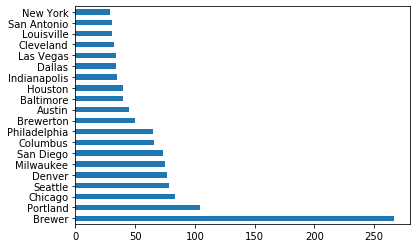

In [0]:
df['city'].value_counts()[:20].plot(kind='barh')

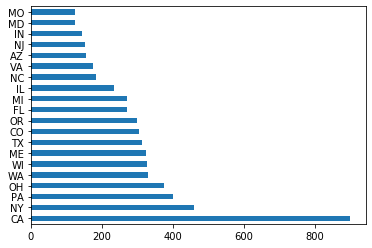

In [0]:
df['province'].value_counts()[:20].plot(kind='barh')

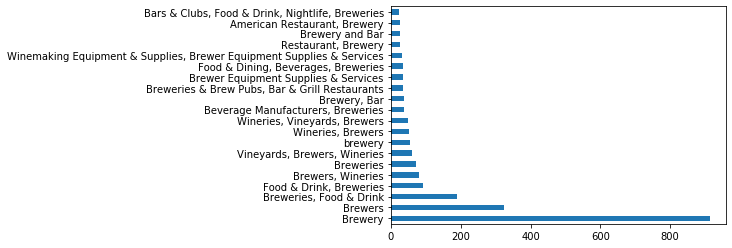

In [0]:
df['categories'].value_counts()[:20].plot(kind='barh')

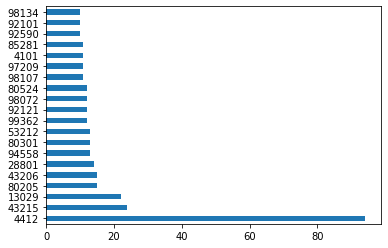

In [0]:
df['postalCode'].value_counts()[:20].plot(kind='barh')

In [0]:
# Install Plotly-geo
!pip install plotly-geo
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

     |████████████████████████████████| 23.7MB 68.7MB/s 
     |████████████████████████████████| 890kB 2.8MB/s 
     |████████████████████████████████| 10.1MB 36.9MB/s 
     |████████████████████████████████| 11.8MB 24.5MB/s 
     |████████████████████████████████| 184kB 2.9MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-cp36-none-any.whl size=20468 sha256=7dd60dbe314125a4c7c8d38c701a2a636d814819b355448853ff8bed37da39a6
  Stored in directory: /root/.cache/pip/wheels/ba/1a/67/6a12977f362c33a15edc753daf92c6f01879dbf4db76faf0dd
Successfully built pyshp
     |████████████████████████████████| 1.5MB 2.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.6.4.post2
    Uninstalling Shapely-1.6.4.post2:
      Successfully uninstalled Shapely-1.6.4.post2


In [0]:
brewery_count =  df['postalCode'].value_counts()
brewery_count = brewery_count.reset_index()
brewery_count.columns = ['ZIP', 'Count']
brewery_count['ZIP'] = brewery_count['ZIP'].str[:5]
brewery_count['ZIP'] = brewery_count['ZIP'].apply('{0:0>5}'.format)
brewery_count = brewery_count[brewery_count.ZIP.apply(lambda x: x.isnumeric())]
brewery_count['ZIP'] = brewery_count['ZIP'].astype('int64')
brewery_count

,ZIP,Count
0,4412,94
1,43215,24
2,13029,22
3,80205,15
4,43206,15
...,...,...
4800,61862,1
4801,97322,1
4802,89103,1
4803,83873,1


In [0]:
# We define our color scale, this is simply the colors we use for each category class in unemployed
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

# Define our categories using np.linspace
endpts=[1,2,3,4,5,6,7,8,9,10,11,12,14,15,25,94]
len(endpts)

16

In [0]:
ziptofip = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/ZIP-COUNTY-FIPS.csv")
ziptofip

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1
...,...,...,...,...,...
46850,820,St. Croix Island,VI,78010,H4
46851,840,St. Croix Island,VI,78010,H4
46852,850,St. Croix Island,VI,78010,H4
46853,830,St. John Island,VI,78020,H4


In [0]:
 brewery_count = brewery_count.merge(ziptofip, on='ZIP' )
 brewery_count.head()

,ZIP,Count,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,4412,94,Penobscot County,ME,23019,H1
1,4412,5,Penobscot County,ME,23019,H1
2,4412,4,Penobscot County,ME,23019,H1
3,4412,4,Penobscot County,ME,23019,H1
4,4412,3,Penobscot County,ME,23019,H1


In [0]:
# put our FIPS into a list 
fips = brewery_count['STCOUNTYFP'].tolist()

In [0]:
# put our unemployed values into a list 
values = brewery_count['Count'].tolist()

In [0]:
# Takes around 30 seconds to execute

# we impot plotly's figure factory
import plotly.figure_factory as ff

fig = ff.create_choropleth(
    fips=fips,
    values=values,
    scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True,
    asp = 2.9, # aspectratio
    title_text = 'Breweries in the US',
    legend_title = 'number of Breweries'
)
fig.layout.template = None
fig.show()

Output hidden; open in https://colab.research.google.com to view.